# Part I: Explore data and generate graphs

### By Cooper Nederhood

In [1]:
# Load libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
gss_location = "C:/Users/Cooper/Documents/Autumn 2017/Perspectives I/persp-analysis/assignments/exploratory-data-analysis/data"
gss_file = "gss2012.csv"

gss = pd.read_csv(gss_location + "/" + gss_file, index_col = "id")
type(gss)

pandas.core.frame.DataFrame

In [3]:
# Generate some basic summary stats to see what the vars are and their types
for c in gss.columns:
    series = gss[c]
    if series.dtype == 'O':
        desc = series.value_counts(dropna = False)
    else:
        desc = series.describe()
        
    print("Field is: {}".format(c))
    print(desc)
    print()

Field is: year
count    1974.0
mean     2012.0
std         0.0
min      2012.0
25%      2012.0
50%      2012.0
75%      2012.0
max      2012.0
Name: year, dtype: float64

Field is: wrkstat
WORKING FULL TIME       912
RETIRED                 357
WORKING PART TIME       226
KEEPING HOUSE           210
UNEMPLOYED, LAID OFF    104
SCHOOL                   70
NaN                      55
TEMP NOT WORKING         40
Name: wrkstat, dtype: int64

Field is: wrkslf
SOMEONE ELSE     1700
SELF-EMPLOYED     194
NaN                80
Name: wrkslf, dtype: int64

Field is: wrkgvt
PRIVATE       1486
GOVERNMENT     371
NaN            117
Name: wrkgvt, dtype: int64

Field is: marital
Married          900
Never married    526
Divorced         317
Widowed          163
Separated         68
Name: marital, dtype: int64

Field is: sibs
count    1971.000000
mean        3.658549
std         3.079752
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        30.000000
Name: sibs


Field is: intspace
NaN                      988
Moderately interested    433
Not at all interested    332
Very interested          221
Name: intspace, dtype: int64

Field is: intenvir
NaN                      983
Very interested          467
Moderately interested    430
Not at all interested     94
Name: intenvir, dtype: int64

Field is: intmil
NaN                      985
Moderately interested    448
Very interested          397
Not at all interested    144
Name: intmil, dtype: int64

Field is: hispanic
NOT HISPANIC                            1701
MEXICAN, MEXICAN AMERICAN, CHICANO/A     168
PUERTO RICAN                              22
SPANISH                                   15
DOMINICAN                                 10
CUBAN                                      9
SALVADORIAN                                7
GUATEMALAN                                 7
HONDURAN                                   6
COLUMBIAN                                  6
NICARAGUAN                             

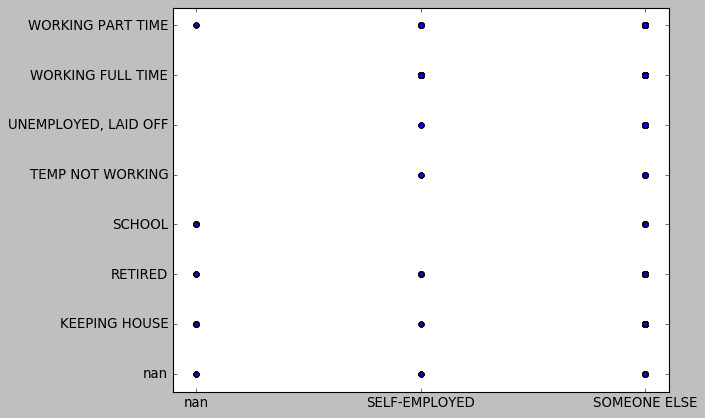

In [13]:
plt.style.use('classic')
plt.scatter( gss.wrkslf, gss.wrkstat)

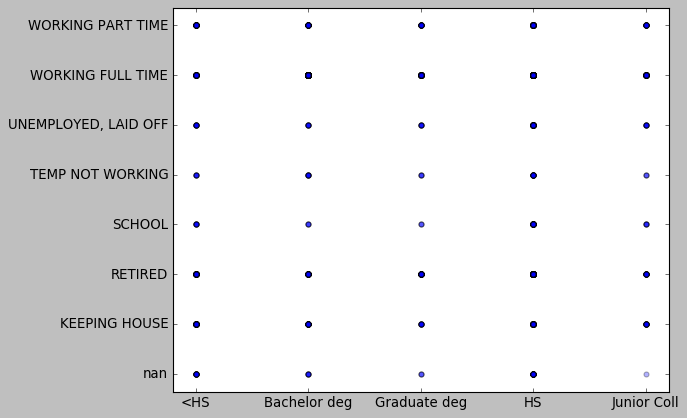

In [14]:
plt.scatter(gss.degree, gss.wrkstat, alpha = .3)

(array([  55.,  210.,  357.,    0.,   70.,   40.,    0.,  104.,  912.,  226.]),
 array([-1. , -0.3,  0.4,  1.1,  1.8,  2.5,  3.2,  3.9,  4.6,  5.3,  6. ]),
 <a list of 10 Patch objects>)

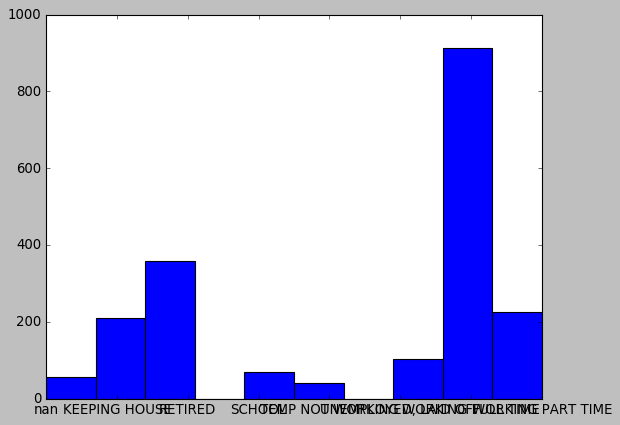

In [15]:
plt.hist(gss.wrkstat)

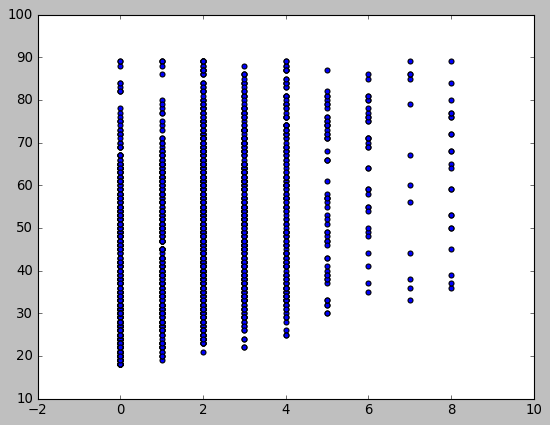

In [16]:
plt.scatter(gss.childs, gss.age)

(array([ 1088.,   886.]),
 array([ 0. ,  0.5,  1. ]),
 <a list of 2 Patch objects>)

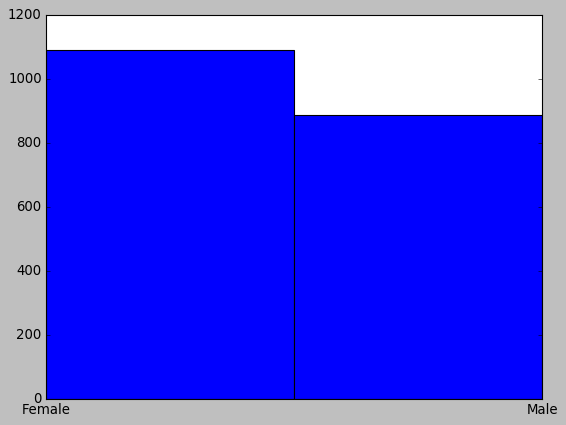

In [17]:
plt.hist(gss.sex, bins = 2)

(array([ 100.,  292.,   68.,    0.,   81.,  244.,    0.,  713.,  268.,  208.]),
 array([-1. , -0.3,  0.4,  1.1,  1.8,  2.5,  3.2,  3.9,  4.6,  5.3,  6. ]),
 <a list of 10 Patch objects>)

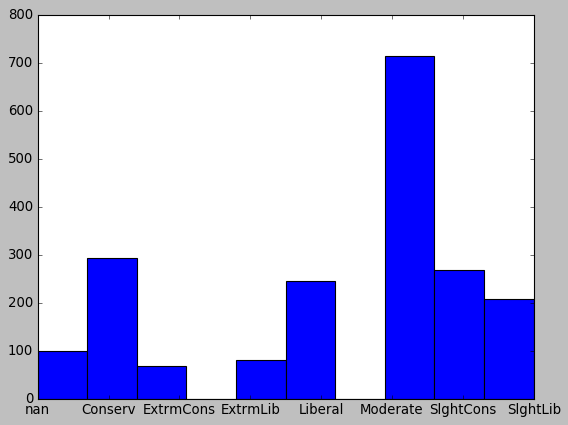

In [18]:
plt.hist(gss.polviews)

(array([ 0.07746849,  0.20351891,  0.05120798,  0.        ,  0.06039916,
         0.18644958,  0.        ,  0.51733193,  0.17594538,  0.15625   ]),
 array([-1. , -0.3,  0.4,  1.1,  1.8,  2.5,  3.2,  3.9,  4.6,  5.3,  6. ]),
 <a list of 10 Patch objects>)

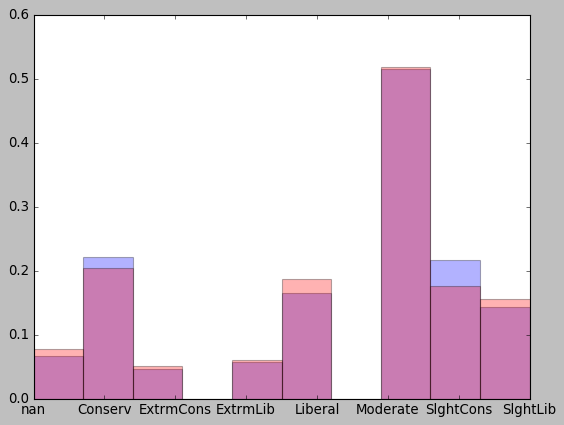

In [19]:
plt.hist(gss.polviews[gss.sex=='Male'], alpha=.3, normed=True)
plt.hist(gss.polviews[gss.sex=='Female'], alpha=.3, color='r', normed=True)

In [20]:
# Practice cuts and selections from pandas DF, for my own edification
men_pct = 100 * gss[gss.sex == 'Male'].polviews.value_counts()/len(gss[gss.sex == 'Male'])
for i in men_pct.index:
    print("Pct of men that are {} is {}%".format(i, men_pct[i]))

gb_pol = gss.groupby('polviews')

Pct of men that are Moderate is 36.00451467268623%
Pct of men that are Conserv is 15.4627539503386%
Pct of men that are SlghtCons is 15.124153498871332%
Pct of men that are Liberal is 11.512415349887133%
Pct of men that are SlghtLib is 10.045146726862303%
Pct of men that are ExtrmLib is 3.950338600451467%
Pct of men that are ExtrmCons is 3.27313769751693%


In [21]:
gc_pct = gss.groupby(['polviews', 'sex']).size() / gss.groupby('sex').size()
gc_pct_df = gc_pct.unstack()

In [31]:
gss.polviews.value_counts()

Moderate     713
Conserv      292
SlghtCons    268
Liberal      244
SlghtLib     208
ExtrmLib      81
ExtrmCons     68
Name: polviews, dtype: int64

<Container object of 8 artists>

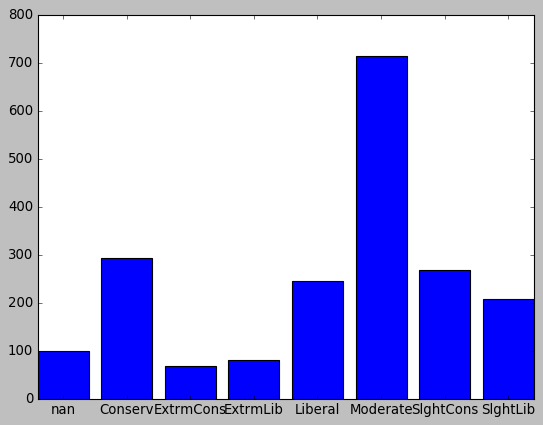

In [43]:
# Moving forward, will be making bar charts for categorical variables rather than histograms
plt.bar(gss.polviews.value_counts(dropna = False).index, gss.polviews.value_counts(dropna = False).values, align='center')

<Container object of 2 artists>

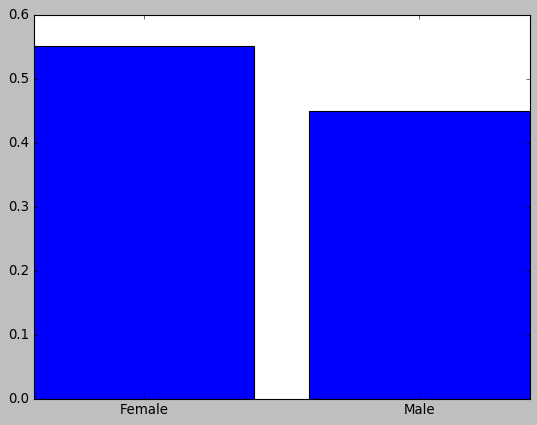

In [45]:
plt.bar(gss.sex.value_counts().index, gss.sex.value_counts().values/sum(gss.sex.value_counts().values), align='center')

<Container object of 10 artists>

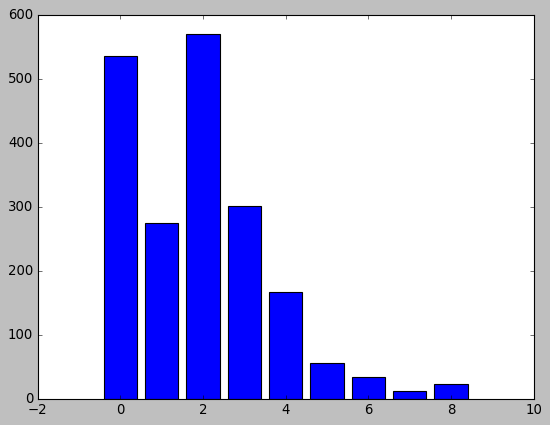

In [49]:
c = gss.childs.value_counts(dropna=False)
plt.bar(c.index, c.values, align='center')

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

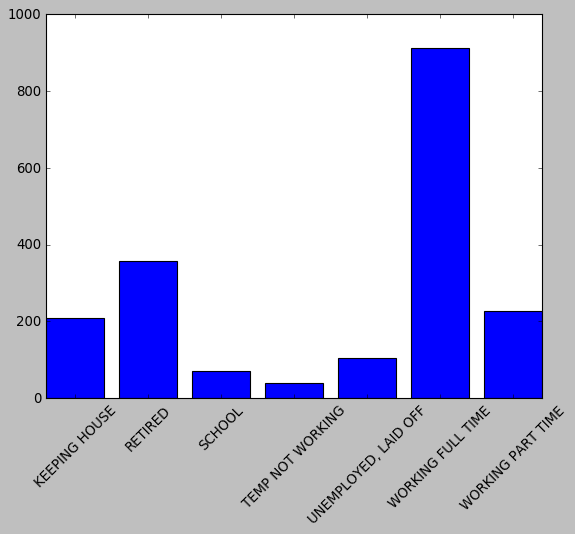

In [63]:
w = gss.wrkstat.value_counts()
plt.bar(w.index, w.values, align='center')
plt.xticks(rotation='45')

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

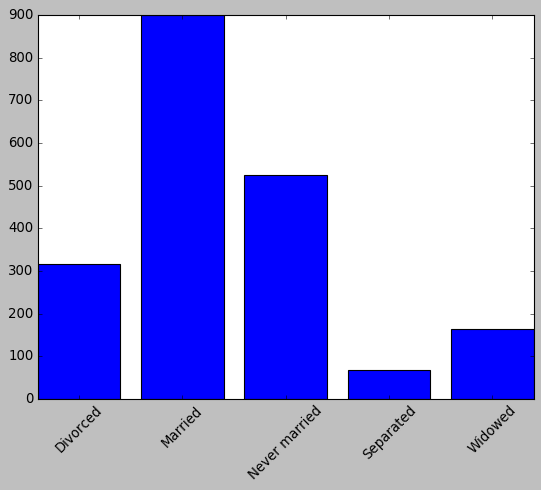

In [66]:
m = gss.marital.value_counts()
plt.bar(m.index, m.values, align='center')
plt.xticks(rotation='45')

(array([ -5.,   0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.]),
 <a list of 9 Text xticklabel objects>)

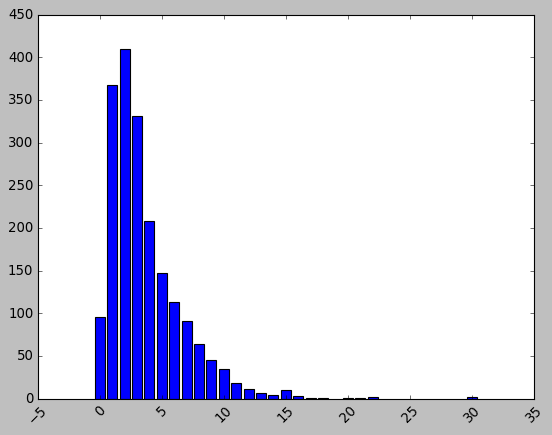

In [67]:
s = gss.sibs.value_counts(dropna=False)
plt.bar(s.index, s.values, align='center')
plt.xticks(rotation='45')

<Container object of 14 artists>

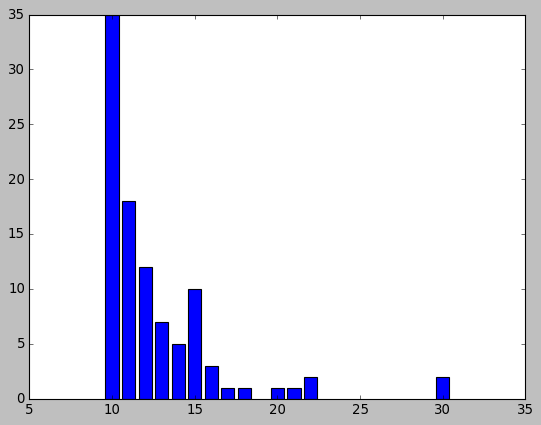

In [81]:
# more than 10 siblings
plt.bar(s.sort_index()[10:].index, s.sort_index()[10:].values, align='center')

<Container object of 73 artists>

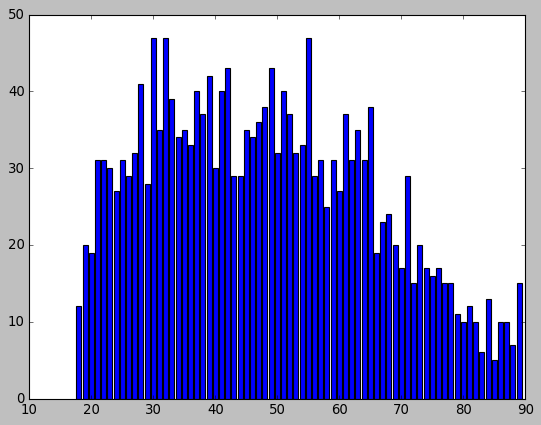

In [82]:
a = gss.age.value_counts(dropna=False)
plt.bar(a.index, a.values, align='center')

<Container object of 3 artists>

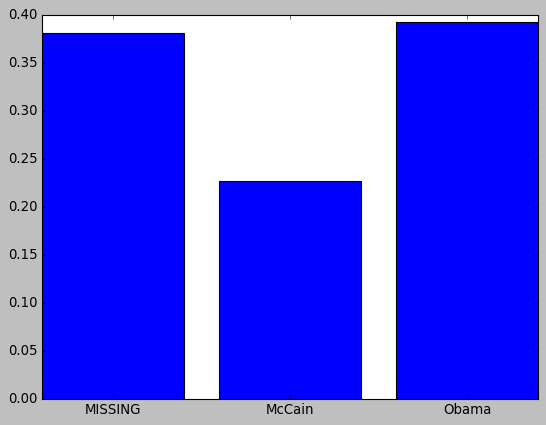

In [98]:
p = gss.pres08.fillna('MISSING').value_counts()
plt.bar(p.index, p.values, align='center')

<Container object of 3 artists>

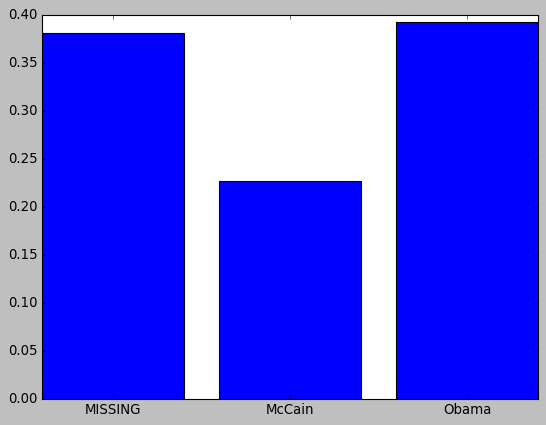

In [99]:
# same graph as pct
plt.bar(p.index, p.values/sum(p.values), align='center')

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

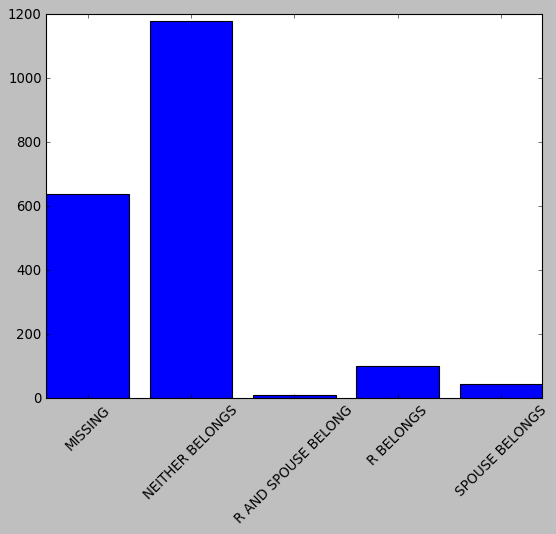

In [101]:
u = gss.union.fillna('MISSING').value_counts()
plt.bar(u.index, u.values, align='center')
plt.xticks(rotation='45')

<Container object of 21 artists>

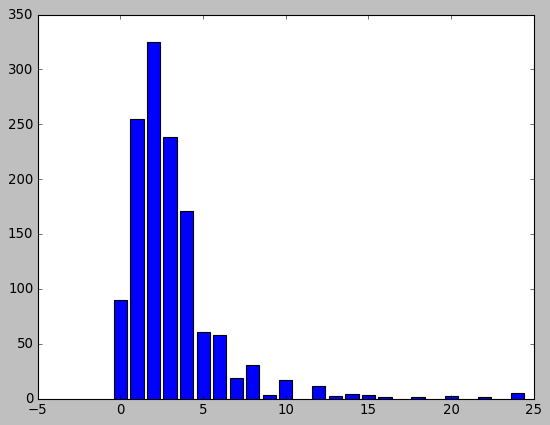

In [106]:
tv = gss.tvhours.value_counts(dropna=False).sort_index()
plt.bar(tv.index, tv.values, align='center')

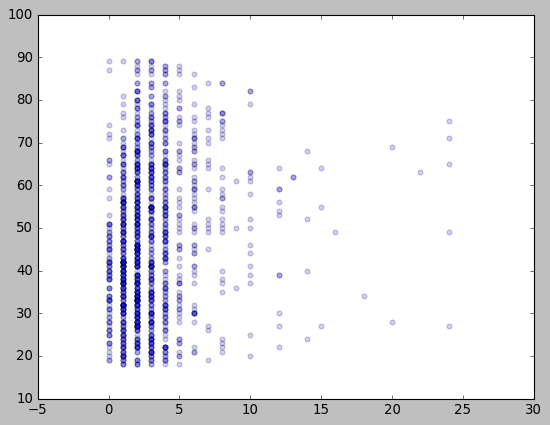

In [109]:
plt.scatter(gss.tvhours, gss.age, alpha=.2)

In [125]:
t = gss.income06.value_counts(dropna=False)

In [232]:
#define income_order so we can have the income brackets ordered logically
income_order = [ 'UNDER $1 000', '$1 000 TO 2 999',  '$3 000 TO 3 999',
          '$4 000 TO 4 999',    '$5 000 TO 5 999', '$6 000 TO 6 999',  '$7 000 TO 7 999', '$8 000 TO 9 999',  '$10000 TO 12499', '$12500 TO 14999', '$15000 TO 17499', '$17500 TO 19999', '$20000 TO 22499', '$22500 TO 24999', '$25000 TO 29999','$30000 TO 34999', '$35000 TO 39999', '$40000 TO 49999',  '$50000 TO 59999',  '$60000 TO 74999',    
         '$75000 TO $89999', '$90000 TO $109999', '$110000 TO $129999',  '$130000 TO $149999', '$150000 OR OVER']

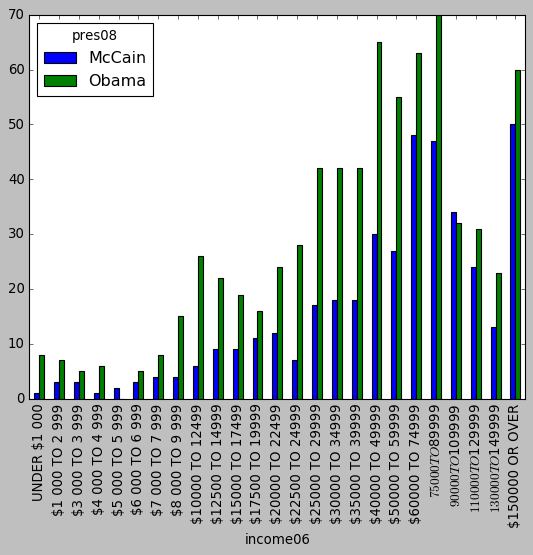

In [233]:
gb_income = gss.groupby(['income06', 'pres08']).size()
gb_income.rename(columns={0:'votes'}, inplace=True)
gb_unstack = gb_income.unstack()
gb_unstack.loc[income_order].plot.bar()

Text(0.5,1,'Voting % non-participation in 2008')

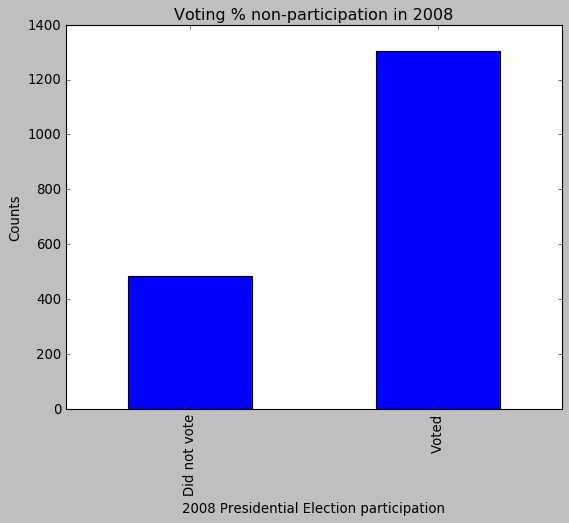

In [308]:
# Check out vote/didn't vote
gss.groupby('voted08').size().plot.bar()
plt.xlabel('2008 Presidential Election participation')
plt.ylabel('Counts')
plt.title('Voting & non-participation in 2008')

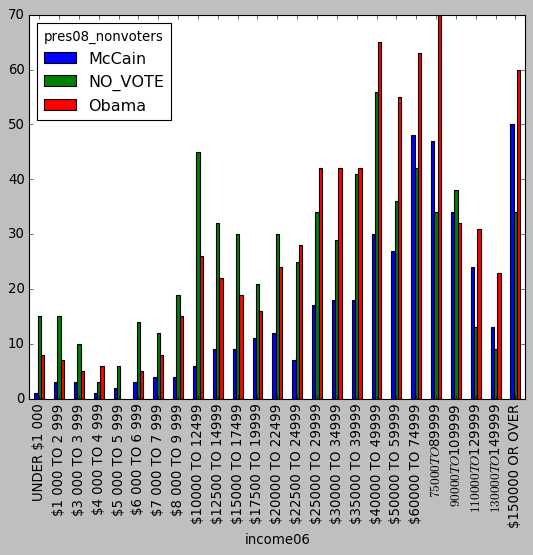

In [249]:
# recreate but code non-voters
gss['pres08_nonvoters'] = gss.pres08.fillna('NO_VOTE')
gb = gss.groupby(['income06', 'pres08_nonvoters']).size().unstack()
gb.loc[income_order].plot.bar()

### What do we see about the population that is not voting?

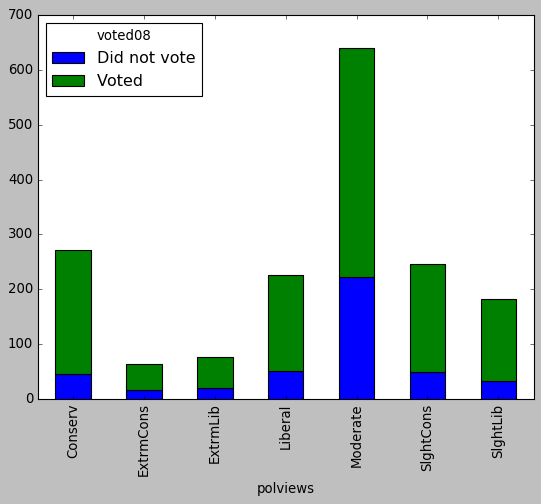

In [265]:
gb = gss.groupby(['polviews', 'voted08']).size().unstack()
gb.plot.bar(stacked=True)

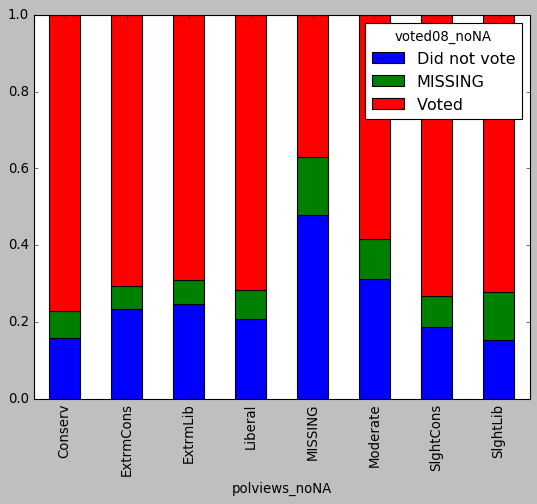

In [288]:
gss['polviews_noNA'] = gss.polviews.fillna('MISSING')
gss['voted08_noNA'] = gss.voted08.fillna('MISSING')
gb_pct = gss.groupby(['polviews_noNA', 'voted08_noNA']).size()/gss.groupby('polviews_noNA').size()
unstack_pct = gb_pct.unstack()
unstack_pct.plot.bar(stacked=True)

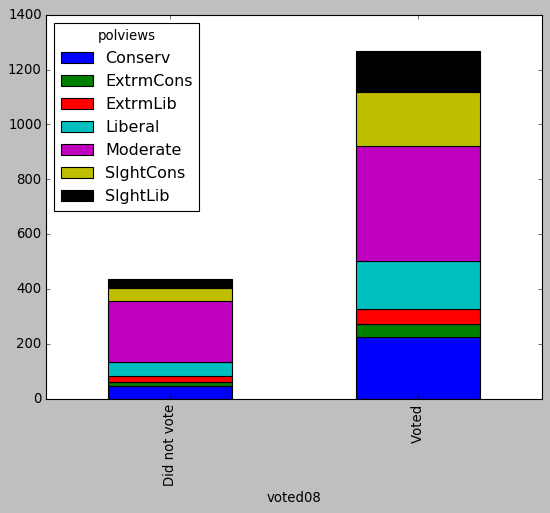

In [268]:
gb = gss.groupby([ 'voted08', 'polviews']).size().unstack()
gb.plot.bar(stacked=True)

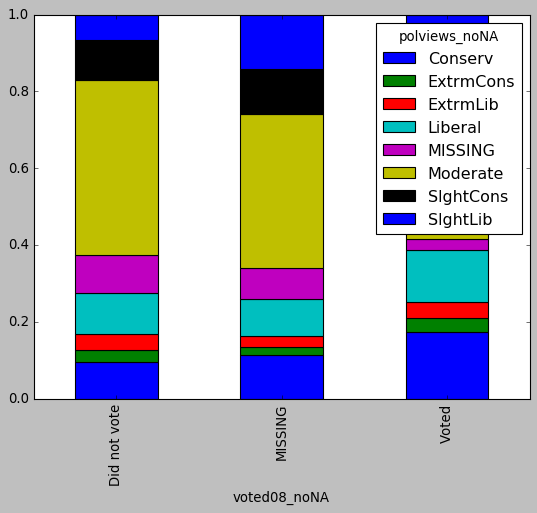

In [294]:
gb = gss.groupby([ 'voted08_noNA', 'polviews_noNA']).size()/gss.groupby([ 'voted08_noNA']).size()
gb_unstack = gb.unstack()
gb_unstack.plot.bar(stacked=True)

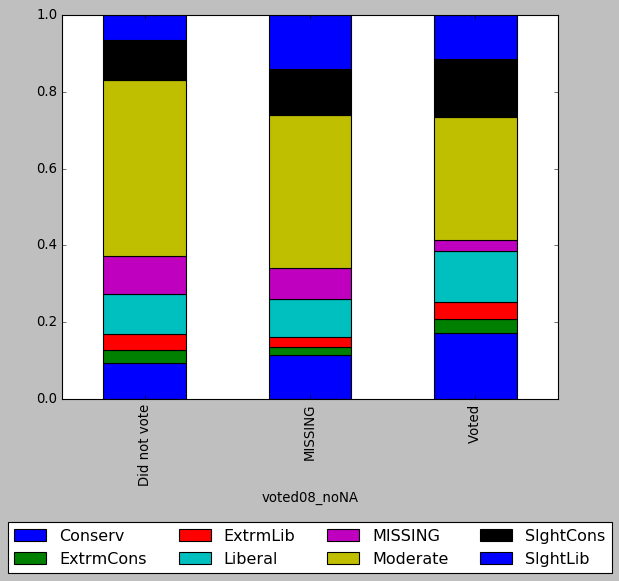

In [303]:
# The 'Did not vote' group is slightly more likely to be Moderates but generally the political distribution is similar
gb_unstack.plot.bar(stacked=True)
plt.legend(loc=9, bbox_to_anchor=(.5, -0.3), ncol=4)

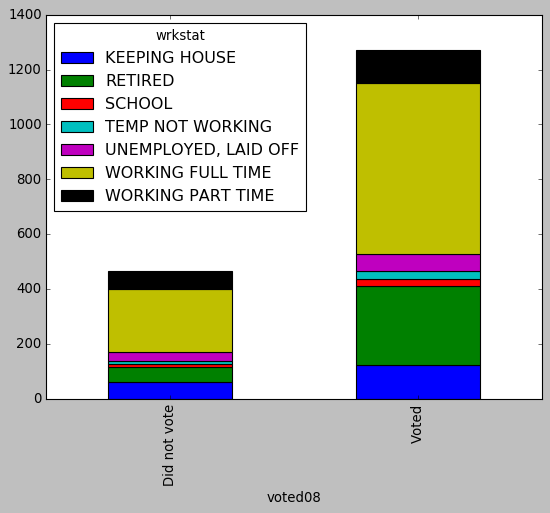

In [271]:
# look into workstatus relationship
gb_ws = gss.groupby(['voted08', 'wrkstat']).size().unstack().plot.bar(stacked=True)

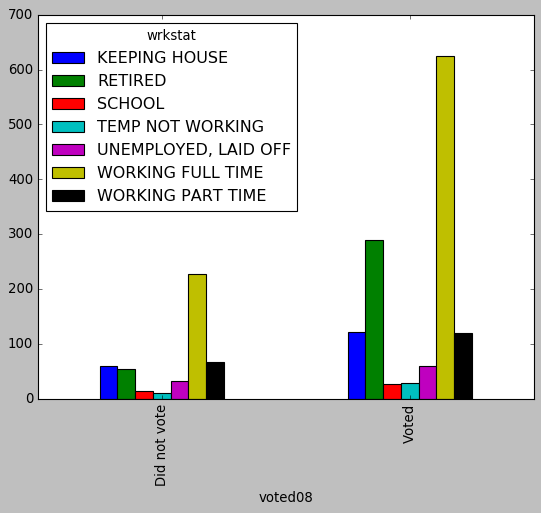

In [272]:
gb_ws = gss.groupby(['voted08', 'wrkstat']).size().unstack().plot.bar()

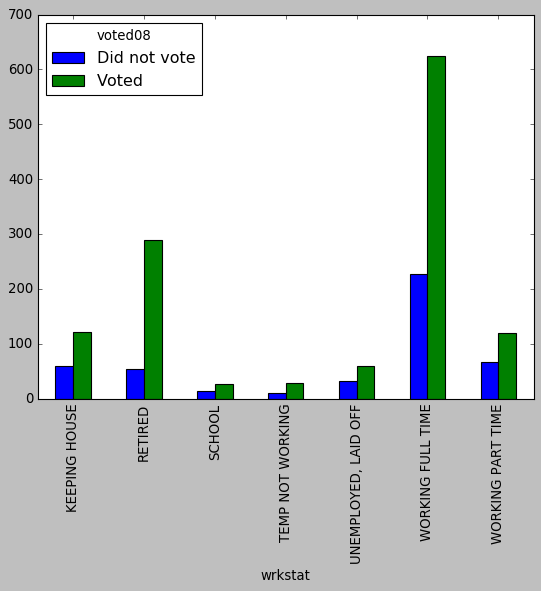

In [273]:
gb_ws = gss.groupby([ 'wrkstat', 'voted08']).size().unstack().plot.bar()

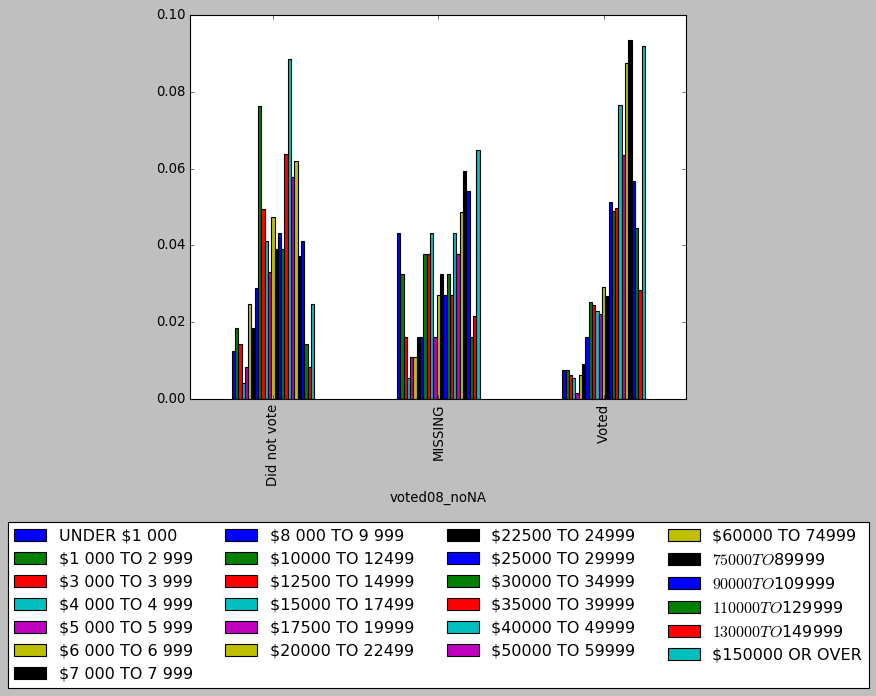

In [305]:
gss['income06_noNA'] = gss.income06.fillna('MISSING')
gb = gss.groupby(['voted08_noNA', 'income06_noNA']).size()/gss.groupby(['voted08_noNA']).size()
unstacked = gb.unstack()
unstacked[income_order].plot.bar()
plt.legend(loc=9, bbox_to_anchor=(.5, -0.3), ncol=4)

C:\Users\Cooper\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'TEST')

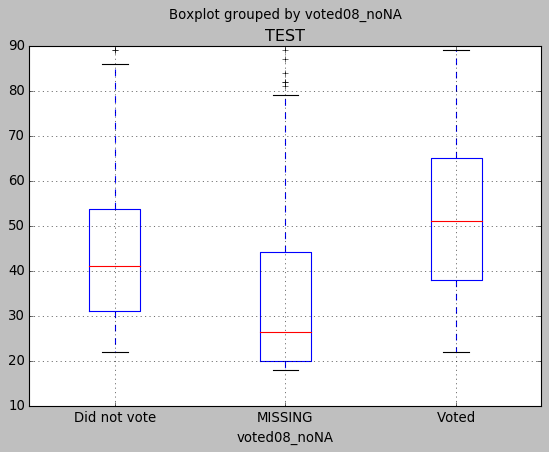

In [325]:
gb = gss.groupby(['age','voted08_noNA']).size()
gb_unstack = gb.unstack()
gss.boxplot(column='age', by='voted08_noNA')